In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
plt.style.use('ggplot')

In [3]:
status = '수면'
deviceNumArray = []
studentRecordDfArr = []

for i in range(0,7):
    studentRecordDf = pd.read_excel("/Users/hyennaeon/Downloads/하틴루_데이터수집_기록표_전원.xlsx", sheet_name=i)
    studentRecordDf = studentRecordDf[studentRecordDf['상태'] == status]
    studentRecordDf = studentRecordDf.reset_index(drop=True)
    deviceNumArray.append((studentRecordDf['기기 번호'][0]))
    studentRecordDfArr.append(studentRecordDf)
startDate = '20230420'
endDate = '20230530'
indexNameArray = ['hr','hr_conv','br','br_conv','mot','r','speed','temperature','humidity','d2']
nameArray = ['하원','효은','민우','명균','지원','정민','채별']
nameArray_compare = ['하원 활동','효은 활동','민우 활동','명균 활동','지원 활동','정민 활동','채별 활동']

In [4]:
studentDf = pd.DataFrame()

for i in range(0,7):
    Url = 'http://52.231.67.67:3000/api/sensorData/duration?deviceNo='+str(deviceNumArray[i])+'&startDate=' + '20230420' + '&endDate=' + '20230530'
    studentWholeDf = pd.read_json(Url)
    studentWholeDf = studentWholeDf.sort_index(ascending=False)
    studentWholeDf = studentWholeDf.reset_index(drop=True)
    studentWholeDf['regdate'] = pd.to_datetime(studentWholeDf['regdate'])
    studentWholeDf['regdate'] = studentWholeDf['regdate'].dt.strftime("%Y-%m-%d %H:%M")
    oneStudent = studentRecordDfArr[i]
    for j in range(0, len(oneStudent)):
        startDate = str(pd.to_datetime(oneStudent['숙면 시작 날짜/시간'][j]))
        endDate = str(pd.to_datetime(oneStudent['숙면 종료 날짜/시간'][j]))
        mask = (studentWholeDf['regdate'] >= startDate) & (studentWholeDf['regdate'] <= endDate) 
        Df = studentWholeDf[mask]
        Df = Df.loc[Df['hr'] != 0]
        Df['userId'] = i
        studentDf = pd.concat([studentDf, Df])


In [5]:
status = '활동'
studentRecordDfArr_active = []

for i in range(0,7):
    studentRecordDf = pd.read_excel("/Users/hyennaeon/Downloads/하틴루_데이터수집_기록표_전원.xlsx", sheet_name=i)
    studentRecordDf = studentRecordDf[studentRecordDf['상태'] == status]
    studentRecordDf = studentRecordDf.reset_index(drop=True)
    studentRecordDfArr_active.append(studentRecordDf)
startDate = '20230420'
endDate = '20230530'
indexNameArray = ['hr','hr_conv','br','br_conv','mot','r','speed','temperature','humidity','d2']
nameArray = ['하원','효은','민우','명균','지원','정민','채별']


In [6]:
studentDf_active = pd.DataFrame()

for i in range(0,7):
    Url = 'http://52.231.67.67:3000/api/sensorData/duration?deviceNo='+str(deviceNumArray[i])+'&startDate=' + '20230420' + '&endDate=' + '20230530'
    studentWholeDf = pd.read_json(Url)
    studentWholeDf = studentWholeDf.sort_index(ascending=False)
    studentWholeDf = studentWholeDf.reset_index(drop=True)
    studentWholeDf['regdate'] = pd.to_datetime(studentWholeDf['regdate'])
    studentWholeDf['regdate'] = studentWholeDf['regdate'].dt.strftime("%Y-%m-%d %H:%M")
    oneStudent = studentRecordDfArr_active[i]
    for j in range(0, len(oneStudent)):
        startDate = str(pd.to_datetime(oneStudent['숙면 시작 날짜/시간'][j]))
        endDate = str(pd.to_datetime(oneStudent['숙면 종료 날짜/시간'][j]))
        mask = (studentWholeDf['regdate'] >= startDate) & (studentWholeDf['regdate'] <= endDate) 
        Df = studentWholeDf[mask]
        Df = Df.loc[Df['hr'] != 0]
        Df['userId'] = i
        studentDf_active = pd.concat([studentDf_active, Df])

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN})

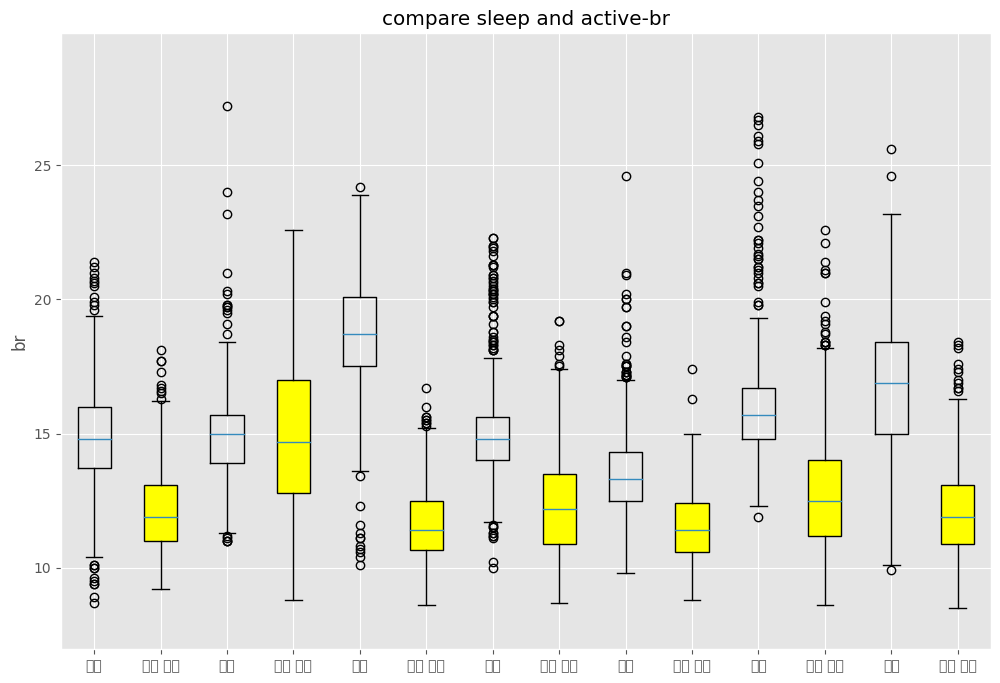

In [22]:
#보고싶은 열 이름 지정 
colName = 'br'

position = [1,3,5,7,9,11,13]
position2 = [2,4,6,8,10,12,14]
ylim = [studentDf[colName].min()*0.8, studentDf[colName].max()*1.1]
plt.figure(figsize=(12, 8))


sleepArray = []
activeArray = []
plt.title("compare sleep and active-"+colName)
for i in range(0,7):
    sleepArray.append(studentDf[studentDf['userId'] == i][colName])
    activeArray.append(studentDf_active[studentDf_active['userId']==i][colName])
plt.boxplot(sleepArray,positions=position)
plt.ylim(ylim)
plt.ylabel(colName)
boxplot = plt.boxplot(activeArray,positions = position2, patch_artist=True)

for box in boxplot['boxes']:
    box.set(facecolor='yellow')
plt.xticks(position + position2, labels=[nameArray[0], nameArray[1], nameArray[2], nameArray[3], nameArray[4], nameArray[5], nameArray[6],
                                          nameArray_compare[0], nameArray_compare[1], nameArray_compare[2], nameArray_compare[3], nameArray_compare[4], nameArray_compare[5], nameArray_compare[6]])

plt.show()

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


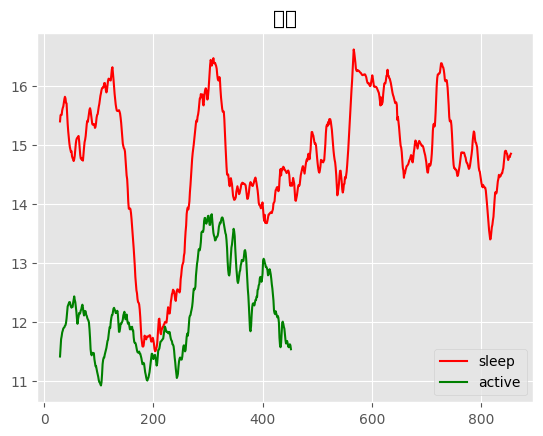

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


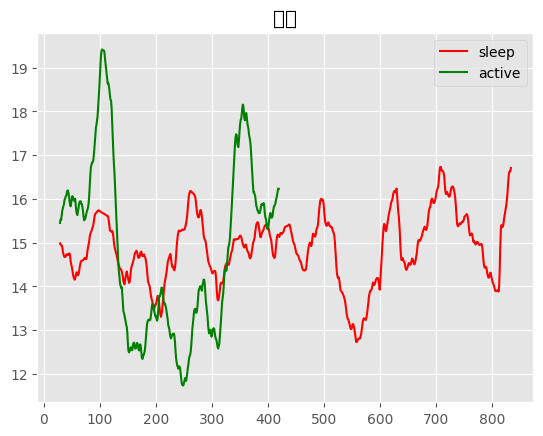

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


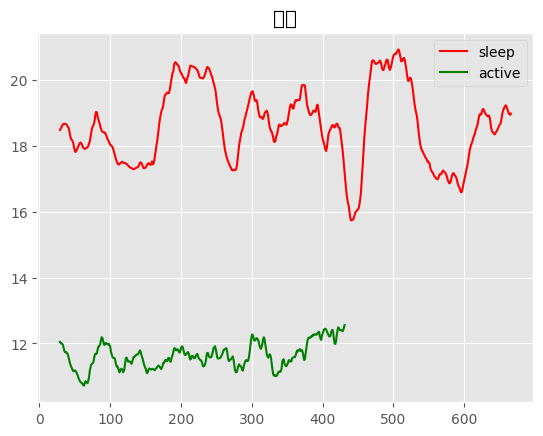

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


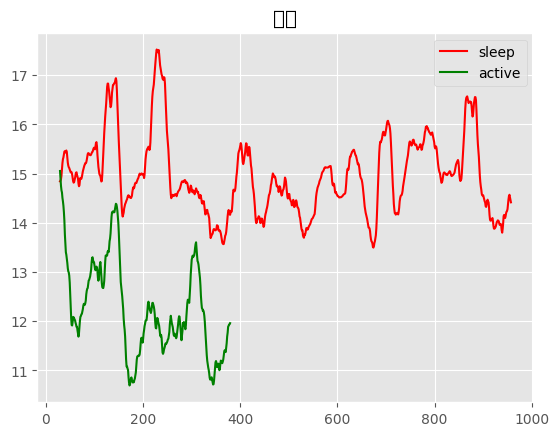

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


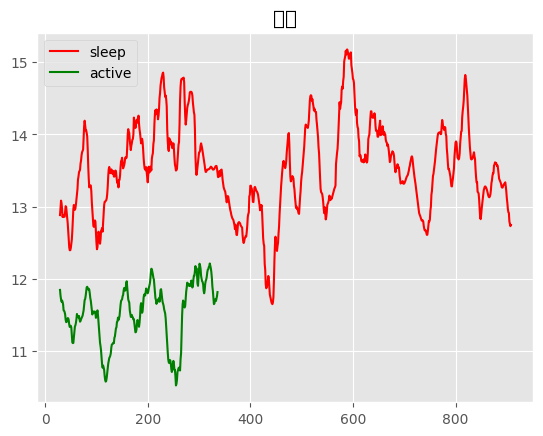

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48124 (\N{HANGUL SYLLABLE MIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


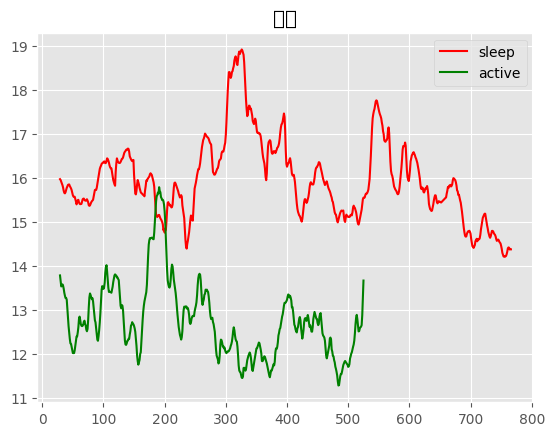

/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hyennaeon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


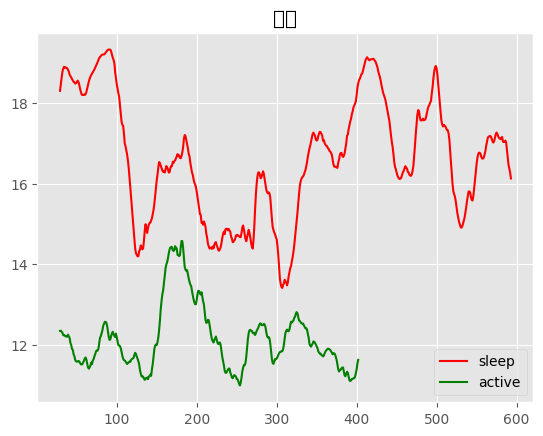

In [23]:
for i in range(0,7):
    studentNum = i
    oneSleepDf = pd.DataFrame(sleepArray[studentNum])
    oneSleepDf = oneSleepDf.reset_index(drop=True)
    oneSleepDf = oneSleepDf.rolling(window=30).mean()
    oneActiveDf = pd.DataFrame(activeArray[studentNum])
    oneActiveDf = oneActiveDf.reset_index(drop=True)
    oneActiveDf = oneActiveDf.rolling(window=30).mean()

    plt.title(nameArray[studentNum])
    plt.plot(oneSleepDf,'r',label = 'sleep')
    plt.plot(oneActiveDf,'g',label = 'active')
    plt.legend()
    plt.show()

In [9]:
for i in range(0,7):
    Df_sleep = studentDf[studentDf['userId'] == i]
    Df_active = studentDf_active[studentDf_active['userId'] == i]

    br_conv_Q1 = Df_active['br_conv'].quantile(.25)
    br_conv_Q2 = Df_active['br_conv'].quantile(.75)

    Df_active = Df_active[Df_active['status'] == 4]
    print(i,"active count: ",len(Df_active))
    
    Df_active = Df_active.loc[(Df_active['br_conv'] >= br_conv_Q1) & (Df_active['br_conv'] <= br_conv_Q2)]
    print(i,"sleep count: ",len(Df_active))

    print("\n")

0 active count:  192
0 sleep count:  104


1 active count:  197
1 sleep count:  87


2 active count:  41
2 sleep count:  28


3 active count:  143
3 sleep count:  76


4 active count:  0
4 sleep count:  0


5 active count:  0
5 sleep count:  0


6 active count:  107
6 sleep count:  52




In [26]:
for i in range(0,7):
    Df_sleep = studentDf[studentDf['userId'] == i]
    Df_active = studentDf_active[studentDf_active['userId'] == i]

    br_mode = Df_sleep['br_conv'].mode()[0]
    print(br_mode)

0.98
0.98
0.98
0.98
0.98
0.98
0.98
